In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
## read in data and view
df = pd.read_csv("/content/Dataset .csv")
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


## Exploratory Data Analysis

*   Display basic information, summary statistics, and missing values.

*   Visualize the distribution of the aggregate rating.

*   Visualize the count of restaurants per city and average rating by city.

*   Visualize the distribution of average cost for two.

*   Visualize correlations between numeric features.

*   Visualize box plots of ratings by price range, table booking availability, and online delivery availability.





In [3]:
df.shape

(9551, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [5]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [6]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [7]:
df.dropna(subset=['Cuisines'], inplace=True)

In [8]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [9]:
df.nunique(axis=0)

Restaurant ID           9542
Restaurant Name         7437
Country Code              15
City                     140
Address                 8910
Locality                1206
Locality Verbose        1263
Longitude               8111
Latitude                8668
Cuisines                1825
Average Cost for two     140
Currency                  12
Has Table booking          2
Has Online delivery        2
Is delivering now          2
Switch to order menu       1
Price range                4
Aggregate rating          33
Rating color               6
Rating text                6
Votes                   1012
dtype: int64

### Drop unnecessary columns

In [10]:
# Drop unnecessary columns
df.drop(columns=['Restaurant ID', 'Restaurant Name', 'Country Code', 'Address', 'Locality', 'Locality Verbose', 'Rating color', 'Rating text'], inplace=True)

##Visualization

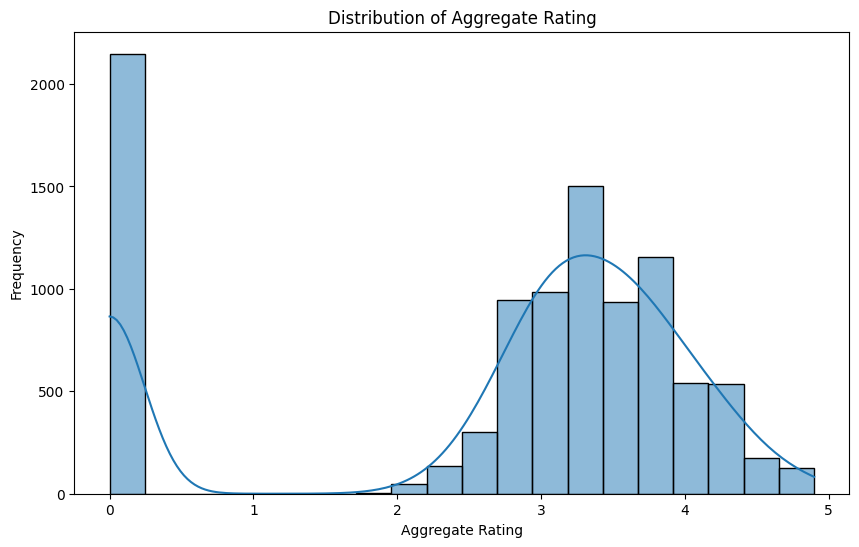

In [11]:
# Distribution of target variable (Aggregate rating)
plt.figure(figsize=(10, 6))
sns.histplot(df['Aggregate rating'], bins=20, kde=True)
plt.title('Distribution of Aggregate Rating')
plt.xlabel('Aggregate Rating')
plt.ylabel('Frequency')
plt.show()

The above chart shows that restaurant ratings are predominantly either 0 or clustered between 2.5 and 4, indicating many non-rated restaurants and a concentration of average to good ratings.

<ipython-input-12-29a8a0a05a41>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_cities.index, x=top_cities.values, palette='viridis')


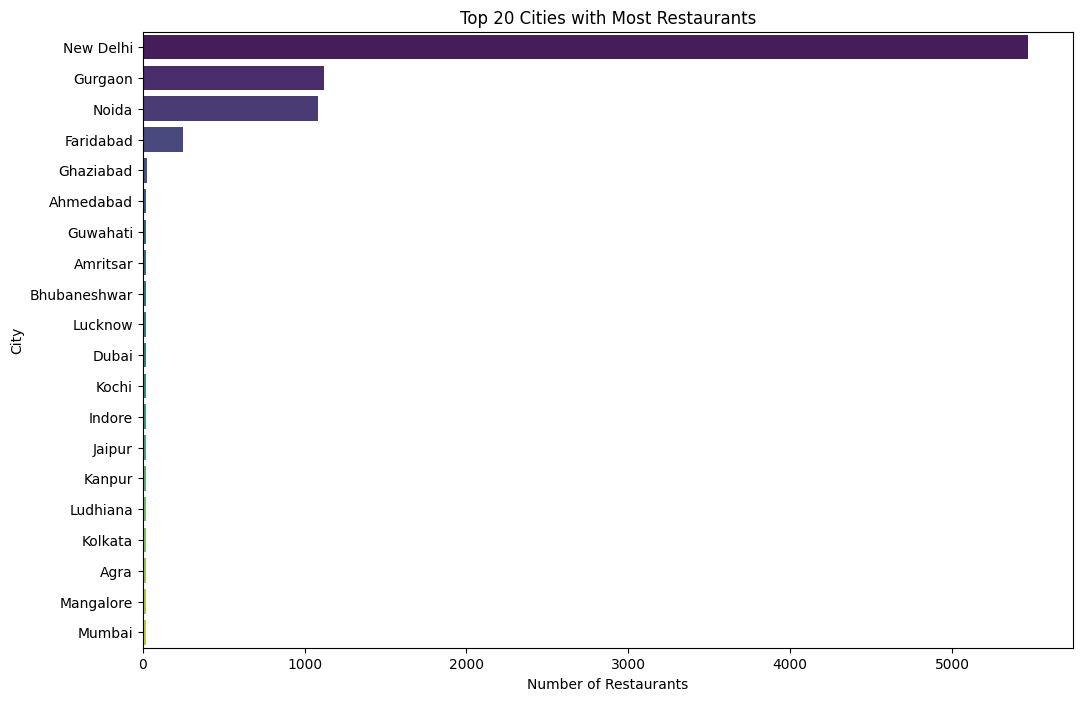

In [12]:
# Count of restaurants per city
plt.figure(figsize=(12, 8))
top_cities = df['City'].value_counts().nlargest(20)
sns.barplot(y=top_cities.index, x=top_cities.values, palette='viridis')
plt.title('Top 20 Cities with Most Restaurants')
plt.xlabel('Number of Restaurants')
plt.ylabel('City')
plt.show()

<ipython-input-13-d30998c2821a>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=avg_rating_city.index, x=avg_rating_city.values, palette='magma')


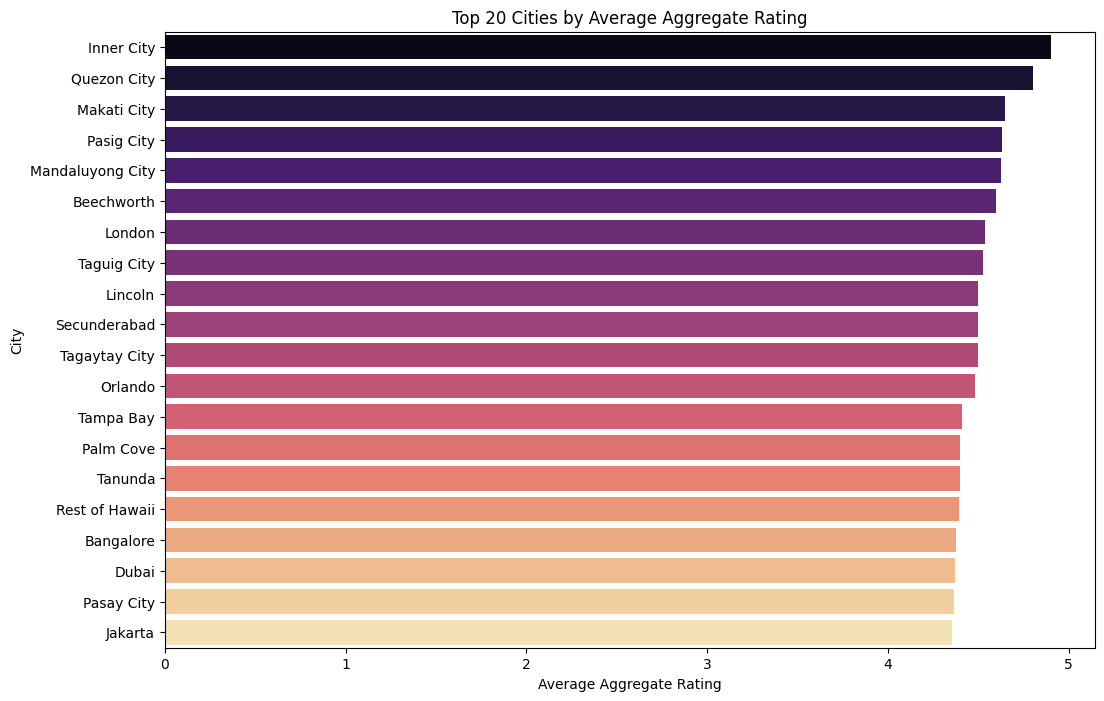

In [13]:
# Average rating by city
avg_rating_city = df.groupby('City')['Aggregate rating'].mean().nlargest(20)
plt.figure(figsize=(12, 8))
sns.barplot(y=avg_rating_city.index, x=avg_rating_city.values, palette='magma')
plt.title('Top 20 Cities by Average Aggregate Rating')
plt.xlabel('Average Aggregate Rating')
plt.ylabel('City')
plt.show()


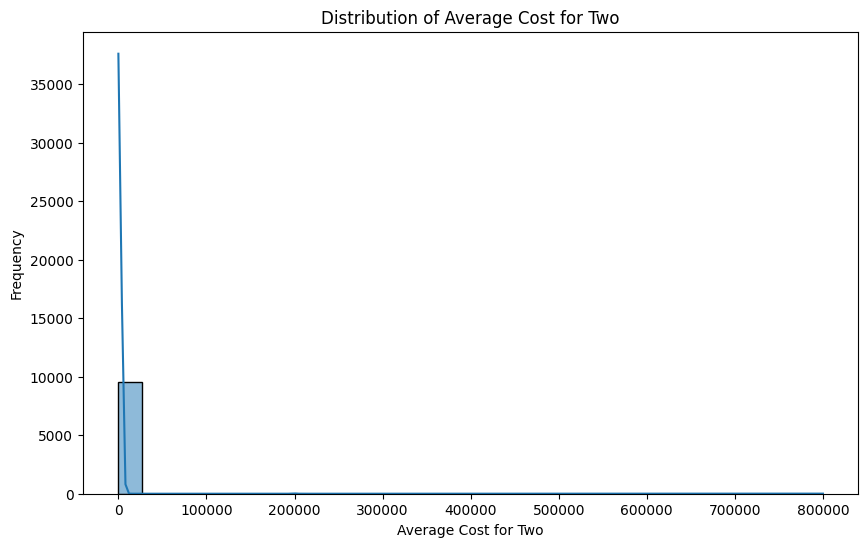

In [14]:
# Average cost for two distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Average Cost for two'], bins=30, kde=True)
plt.title('Distribution of Average Cost for Two')
plt.xlabel('Average Cost for Two')
plt.ylabel('Frequency')
plt.show()


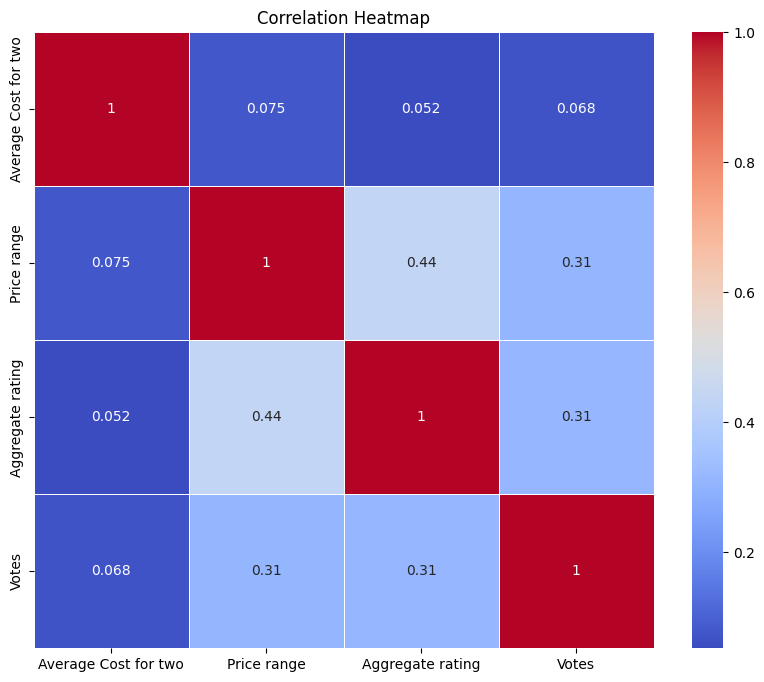

In [15]:
# Correlation heatmap of numeric features
numeric_cols = ['Average Cost for two', 'Price range', 'Aggregate rating', 'Votes']
plt.figure(figsize=(10, 8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

<ipython-input-16-c8ff287e72fb>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Price range', y='Aggregate rating', data=df, palette='Set2')


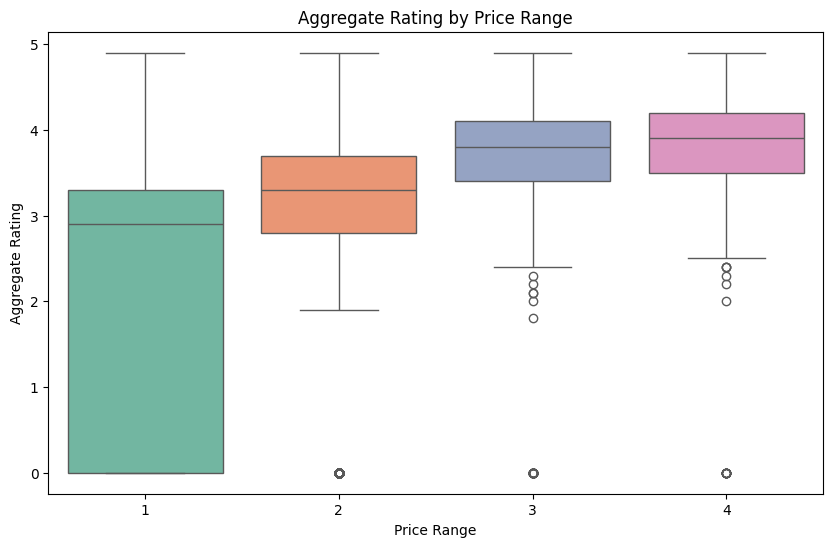

In [16]:
# Box plot of ratings by price range
plt.figure(figsize=(10, 6))
sns.boxplot(x='Price range', y='Aggregate rating', data=df, palette='Set2')
plt.title('Aggregate Rating by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Aggregate Rating')
plt.show()


The box plot shows that higher price ranges (2, 3, and 4) tend to have higher median aggregate ratings compared to the lowest price range (1), indicating that more expensive restaurants generally receive better ratings.

<ipython-input-17-c5987f1d89d1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Has Table booking', y='Aggregate rating', data=df, palette='Set3')


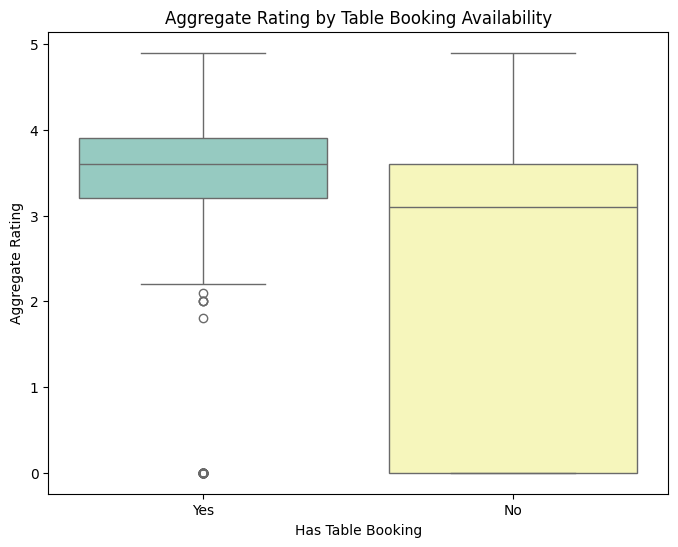

In [17]:
# Box plot of ratings by "Has Table booking"
plt.figure(figsize=(8, 6))
sns.boxplot(x='Has Table booking', y='Aggregate rating', data=df, palette='Set3')
plt.title('Aggregate Rating by Table Booking Availability')
plt.xlabel('Has Table Booking')
plt.ylabel('Aggregate Rating')
plt.show()

<ipython-input-18-d47e8c0873cb>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Has Online delivery', y='Aggregate rating', data=df, palette='Set1')


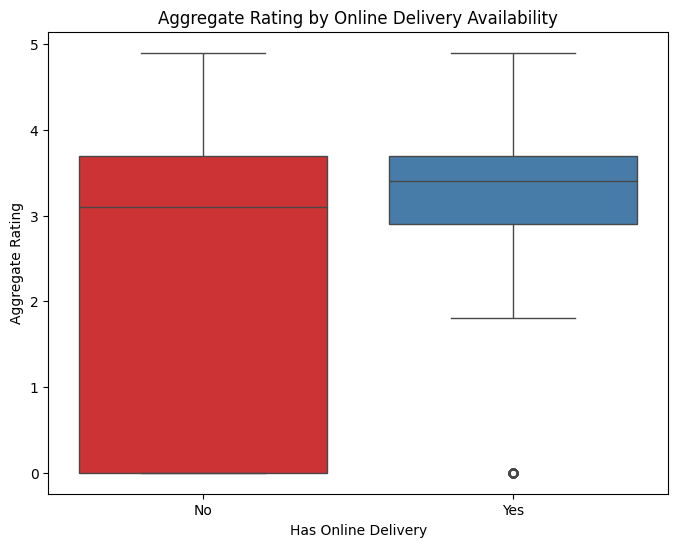

In [18]:
# Box plot of ratings by "Has Online delivery"
plt.figure(figsize=(8, 6))
sns.boxplot(x='Has Online delivery', y='Aggregate rating', data=df, palette='Set1')
plt.title('Aggregate Rating by Online Delivery Availability')
plt.xlabel('Has Online Delivery')
plt.ylabel('Aggregate Rating')
plt.show()

##Data Preprocessing

In [19]:
# Encode 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu' to binary
df['Has Table booking'] = df['Has Table booking'].apply(lambda x: 1 if x == 'Yes' else 0)
df['Has Online delivery'] = df['Has Online delivery'].apply(lambda x: 1 if x == 'Yes' else 0)
df['Is delivering now'] = df['Is delivering now'].apply(lambda x: 1 if x == 'Yes' else 0)
df['Switch to order menu'] = df['Switch to order menu'].apply(lambda x: 1 if x == 'Yes' else 0)

In [20]:
## only select columns we want to use in prediction

df.head()

,City,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Votes
0,Makati City,121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),1,0,0,0,3,4.8,314
1,Makati City,121.014101,14.553708,Japanese,1200,Botswana Pula(P),1,0,0,0,3,4.5,591
2,Mandaluyong City,121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),1,0,0,0,4,4.4,270
3,Mandaluyong City,121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),0,0,0,0,4,4.9,365
4,Mandaluyong City,121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),1,0,0,0,4,4.8,229


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9542 entries, 0 to 9550
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   City                  9542 non-null   object 
 1   Longitude             9542 non-null   float64
 2   Latitude              9542 non-null   float64
 3   Cuisines              9542 non-null   object 
 4   Average Cost for two  9542 non-null   int64  
 5   Currency              9542 non-null   object 
 6   Has Table booking     9542 non-null   int64  
 7   Has Online delivery   9542 non-null   int64  
 8   Is delivering now     9542 non-null   int64  
 9   Switch to order menu  9542 non-null   int64  
 10  Price range           9542 non-null   int64  
 11  Aggregate rating      9542 non-null   float64
 12  Votes                 9542 non-null   int64  
dtypes: float64(3), int64(7), object(3)
memory usage: 1.0+ MB


In [22]:
# Separate features and target variable
X = df.drop('Aggregate rating', axis=1)
y = df['Aggregate rating']

In [23]:
# Identify categorical and numeric columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numeric_cols = X.select_dtypes(include=['number']).columns.tolist()

In [24]:
# Create preprocessing pipelines for numeric and categorical data
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

In [25]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [26]:
# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])


##Model Training and Evaluation

In [29]:
# Create a pipeline that includes preprocessing and the regressor
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

In [30]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
# Train the model(Randomforestregressor)
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Longitude', 'Latitude',
                                                   'Average Cost for two',
                                                   'Has Table booking',
                                                   'Has Online delivery',
                                                   'Is delivering now',
                                                   'Switch to order menu',
                                                   'Price range', 'Votes']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['City', 'Cuisines',
                                                   'Currency'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [32]:
# Step 3: Model Evaluation
# Predict the test set results
y_pred = model.predict(X_test)

In [33]:
# Calculate regression metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-Squared: {r2:.2f}")



Mean Squared Error: 0.09
R-Squared: 0.96


In [34]:
# Step 4: Interpretation and Feature Analysis

# Extract feature importances from the model
feature_importances = model.named_steps['regressor'].feature_importances_
feature_names = numeric_cols + list(model.named_steps['preprocessor'].transformers_[1][1].named_steps['onehot'].get_feature_names_out(categorical_cols))
importances = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

In [35]:
# Sort importances by value
importances_sorted = importances.sort_values(by='Importance', ascending=False)
print(importances_sorted.head(10))
# Display top influential features


                                      Feature  Importance
8                                       Votes    0.945281
0                                   Longitude    0.013799
1                                    Latitude    0.010417
2                        Average Cost for two    0.004763
1713              Currency_Indian Rupees(Rs.)    0.002945
4                         Has Online delivery    0.000863
1285           Cuisines_North Indian, Chinese    0.000799
7                                 Price range    0.000595
1447  Cuisines_North Indian, Mughlai, Chinese    0.000553
1533                Cuisines_Pizza, Fast Food    0.000548


<ipython-input-37-0264ebf9e3cf>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importances_sorted.head(10), palette='viridis')


<Axes: xlabel='Importance', ylabel='Feature'>

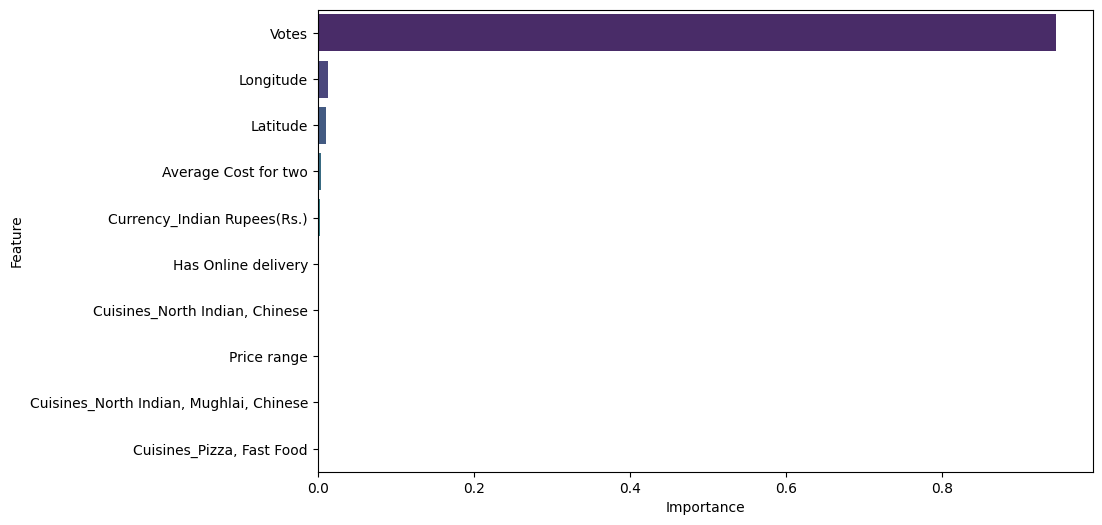

In [37]:
# Visualize the top 10 influential features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importances_sorted.head(10), palette='viridis')

Model: Linear Regression
Mean Squared Error: 1.46
R-Squared: 0.36

                                                Feature  Importance
1020                  Cuisines_Italian, American, Pizza    5.107106
169                     Cuisines_American, Burger, Cafe    4.456338
159                    Cuisines_American, Bar Food, BBQ    3.845487
1006                           Cuisines_Indian, Persian    3.833203
1464  Cuisines_North Indian, Mughlai, Nepalese, Tibe...    2.992937
713   Cuisines_Continental, Chinese, North Indian, I...    2.895506
367                         Cuisines_Brazilian, Mineira    2.825593
534                 Cuisines_Cafe, Mexican, Continental    2.819892
605                          Cuisines_Chinese, Lucknowi    2.817726
1677                                       Cuisines_Tea    2.764075


<ipython-input-64-0e39d5fc6d69>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importances_sorted.head(10), palette='viridis')


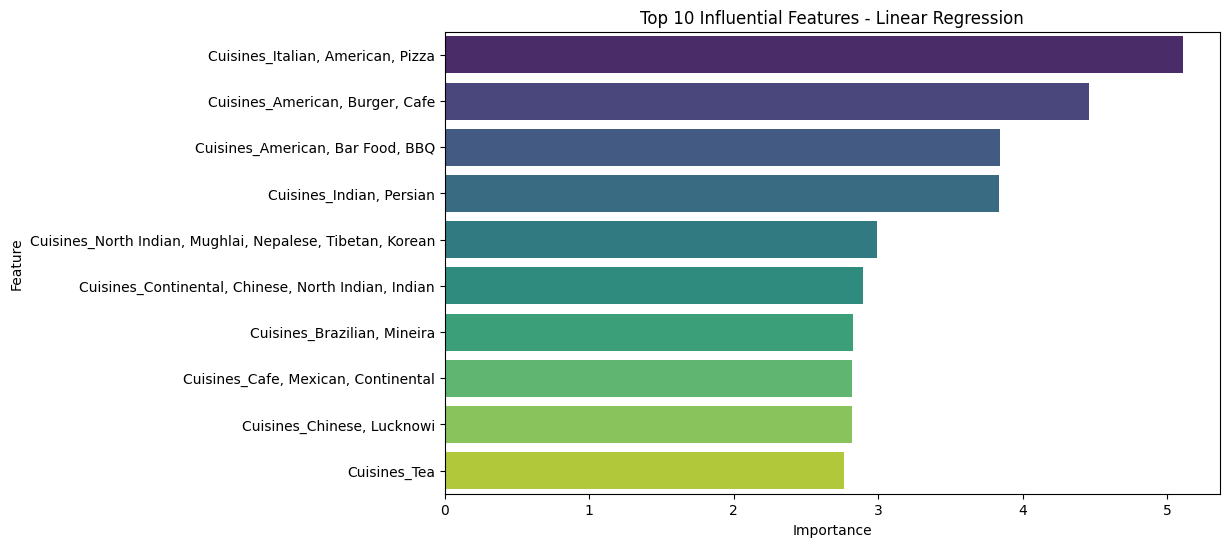

Model: Decision Tree Regressor
Mean Squared Error: 0.16
R-Squared: 0.93

                             Feature  Importance
8                              Votes    0.945025
0                          Longitude    0.019082
1                           Latitude    0.009545
2               Average Cost for two    0.005009
4                Has Online delivery    0.000926
1710     Currency_Brazilian Real(R$)    0.000815
1285  Cuisines_North Indian, Chinese    0.000676
566                 Cuisines_Chinese    0.000631
7                        Price range    0.000578
1533       Cuisines_Pizza, Fast Food    0.000507


<ipython-input-64-0e39d5fc6d69>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importances_sorted.head(10), palette='viridis')


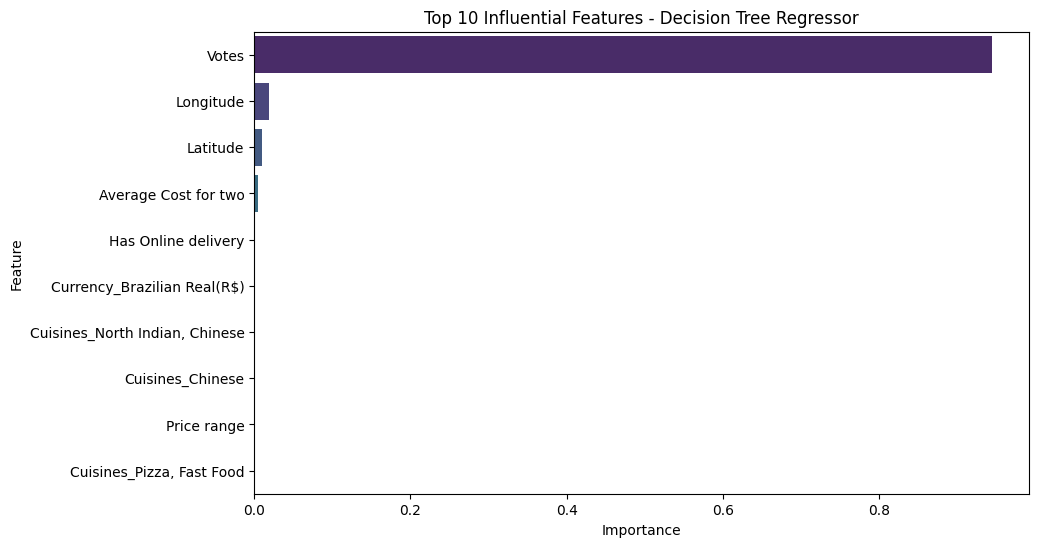

In [64]:
# Function to train and evaluate a model
def train_evaluate_model(model, model_name):
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train the model
    pipeline.fit(X_train, y_train)

    # Predict the test set results
    y_pred = pipeline.predict(X_test)

    # Calculate regression metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Model: {model_name}")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"R-Squared: {r2:.2f}\n")

    # Extract feature importances or coefficients
    if model_name == "Linear Regression":
        feature_importances = np.abs(pipeline.named_steps['regressor'].coef_)
    else:
        feature_importances = pipeline.named_steps['regressor'].feature_importances_

    feature_names = numeric_cols + list(pipeline.named_steps['preprocessor'].transformers_[1][1].named_steps['onehot'].get_feature_names_out(categorical_cols))
    importances = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

    # Sort importances by value
    importances_sorted = importances.sort_values(by='Importance', ascending=False)
    print(importances_sorted.head(10))  # Display top influential features

    # Visualize the top 10 influential features
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=importances_sorted.head(10), palette='viridis')
    plt.title(f'Top 10 Influential Features - {model_name}')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.show()

# Train and evaluate Linear Regression model
linear_regressor = LinearRegression()
train_evaluate_model(linear_regressor, "Linear Regression")

# Train and evaluate Decision Tree Regressor model
decision_tree_regressor = DecisionTreeRegressor(random_state=42)
train_evaluate_model(decision_tree_regressor, "Decision Tree Regressor")

The Random Forest Regressor clearly outperforms both the Linear Regression and Decision Tree Regressor models in terms of both MSE and R². This suggests that the Random Forest Regressor is the best model for predicting restaurant ratings

##Cross validation

In [71]:
#Cross Validation for Random forest model
cv_scores_rf = cross_val_score(model, X, y, cv=5, scoring='r2', n_jobs=-1)
print(f"Cross-Validation R-Squared Scores: {cv_scores_rf}")
print(f"Mean Cross-Validation R-Squared: {np.mean(cv_scores_rf)}")


Cross-Validation R-Squared Scores: [0.91549812 0.94053719 0.9675201  0.9603495  0.94976782]
Mean Cross-Validation R-Squared: 0.9467345455301306


Overall, the Random Forest model shows strong predictive capabilities and is likely to provide reliable predictions for restaurant ratings based on the features used in the analysis